### Singular Value Decomposition

The singular value decomposition (SVD) is a way to decompose a matrix into constituent parts. It is a more general form of the eigendecomposition. While the eigendecomposition is limited to square matrices, the singular value decomposition can be applied to non-square matrices.

SVD of matrix $A$ is: 

$A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

Specifically, the SVD decomposes any matrix A into an orthogonal matrix U, a diagonal matrix D, and another orthogonal matrix $UDV^T$. Singular Value Decomposition is the Eigen Value decomposition of $AA^T$.

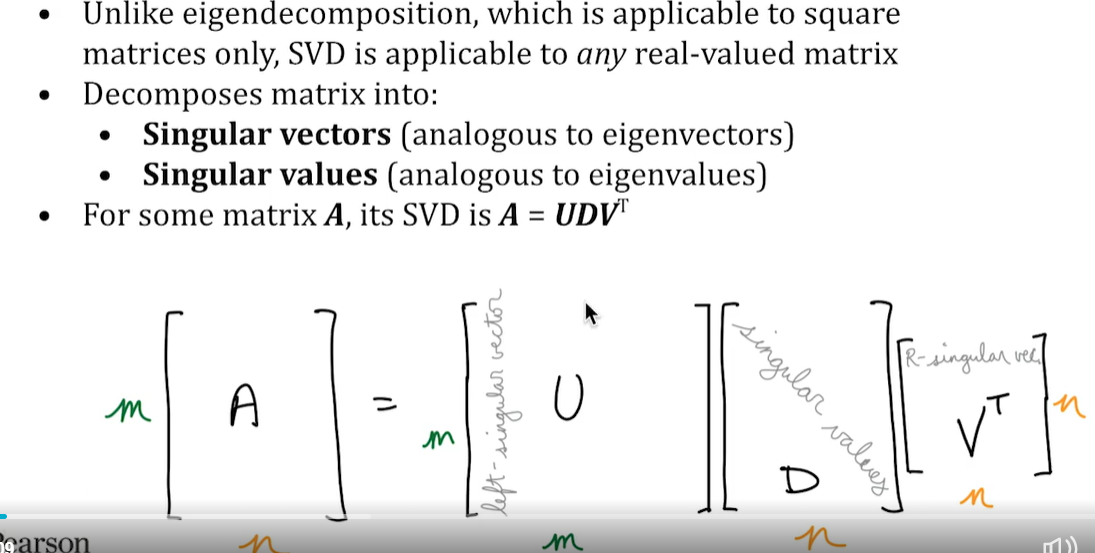

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://learning.oreilly.com/

#### How this works:

Let's look at $AA^T$:

If $A = UDV^T$:

$A^TA =  (VD^TU^T)  (UDV^T) $

Since U is an orthogonal matrix, $U^TU = I$

$A^TA =  V(D^TD)V^T$

and since V is an orthogonal matrix, $V^T = V^{-1}$

$A^TA =  V(D^TD)V^{-1}$


Since $(D^TD)$ is also a diagonal matrix, this is of the form Eigen Decomposition.

<b>Hence Singular value decomposition is a form of Eigen value decomposition that helps us in diagonalizing any matrix (square or non square)</b>


<b>The matrices U and V are column-orthogonal, which means all matrices U, D, and $V^T$ are linearly independent. This is extremely important in data science and machine learning because it allows you to conceptually separate information into distinct and independent concepts.<b>



In [63]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Imagine you had a grocery store selling different products, and you captured all your products as columns in a matrix and all customers as rows. Every row indicates how many items of a certain product a consumer has bought. We assume that buying larger amounts of a certain product indicates a greater preference.

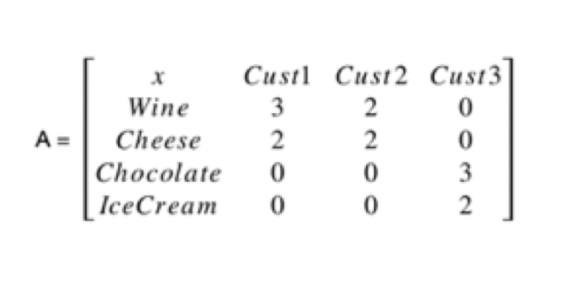

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

In [64]:
A = np.array([[3, 2, 0],[2, 2, 0],[0, 0, 3],[0, 0, 2]])
A

array([[3, 2, 0],
       [2, 2, 0],
       [0, 0, 3],
       [0, 0, 2]])

In [65]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [66]:
U

array([[-0.78820544,  0.        , -0.61541221,  0.        ],
       [-0.61541221,  0.        ,  0.78820544,  0.        ],
       [ 0.        , -0.83205029,  0.        , -0.5547002 ],
       [ 0.        , -0.5547002 ,  0.        ,  0.83205029]])

You can think of U as representing the similarity of various products to certain concepts.

In [67]:
d

array([4.56155281, 3.60555128, 0.43844719])

d represents the strength of that concept.

In [68]:
VT

array([[-0.78820544, -0.61541221, -0.        ],
       [-0.        , -0.        , -1.        ],
       [-0.61541221,  0.78820544,  0.        ]])

$V^T$ encapsulates a concept such as a “wine lover” or a cheese lover.

In this case, it seems to me that there must be something like a “french gourmand” who likes wine and cheese but who doesn’t like sweets and a sweet lover who doesn’t like wine and cheese. The first two column entries in U indicate that wine has a high similarity to the concept of a French gourmand. Sigma shows us that this seems to be a strong concept, and $V^T$ indicates that Customers 1 and 2 strongly associate with this concept.

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible: 

In [69]:
D = np.concatenate((np.diag(d), [[0, 0, 0]]), axis=0)
D

array([[4.56155281, 0.        , 0.        ],
       [0.        , 3.60555128, 0.        ],
       [0.        , 0.        , 0.43844719],
       [0.        , 0.        , 0.        ]])

In [70]:
np.dot(U, np.dot(D, VT)) 

array([[3., 2., 0.],
       [2., 2., 0.],
       [0., 0., 3.],
       [0., 0., 2.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvectors of $AA^T$ = square roots of eigenvectors of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [71]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [72]:
lambdas1, EV1 = np.linalg.eig(np.dot(A,A.T))

In [73]:
U

array([[-0.78820544,  0.        , -0.61541221,  0.        ],
       [-0.61541221,  0.        ,  0.78820544,  0.        ],
       [ 0.        , -0.83205029,  0.        , -0.5547002 ],
       [ 0.        , -0.5547002 ,  0.        ,  0.83205029]])

In [74]:
EV1

array([[ 0.78820544, -0.61541221,  0.        ,  0.        ],
       [ 0.61541221,  0.78820544,  0.        ,  0.        ],
       [ 0.        , -0.        ,  0.83205029, -0.5547002 ],
       [ 0.        , -0.        ,  0.5547002 ,  0.83205029]])

In [75]:
lambdas2, EV2 = np.linalg.eig(np.dot(A.T,A))

In [76]:
VT

array([[-0.78820544, -0.61541221, -0.        ],
       [-0.        , -0.        , -1.        ],
       [-0.61541221,  0.78820544,  0.        ]])

In [77]:
EV2

array([[ 0.78820544, -0.61541221,  0.        ],
       [ 0.61541221,  0.78820544,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [78]:
np.round(lambdas1)

array([21.,  0., 13., -0.])

In [79]:
np.round(lambdas2)

array([21.,  0., 13.])

In [80]:
np.square(d)

array([20.80776406, 13.        ,  0.19223594])

### Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [81]:
from PIL import Image

In [84]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg --no-check-certificate

--2022-01-09 11:20:08--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: 'oboe-with-book.jpg'

     0K .......... .......... .......... .......... .......... 12% 2.45M 0s
    50K .......... .......... .......... .......... .......... 24% 5.42M 0s
   100K .......... .......... .......... .......... .......... 36% 3.39M 0s
   150K .......... .......... .......... .......... .......... 48% 7.89M 0s
   200K .......... .......... .......... .......... .......... 61% 4.70M 0s
   250K .......... .......... .......... .......... .......... 73% 9.09M 0s
   300K .......... .......... .......... .

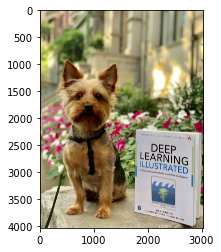

In [85]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

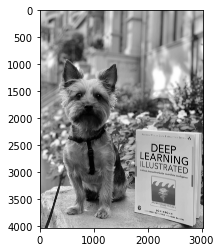

In [86]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data: 

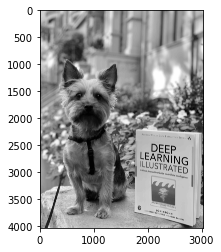

In [87]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [88]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

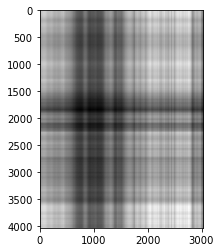

In [89]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality: 
    

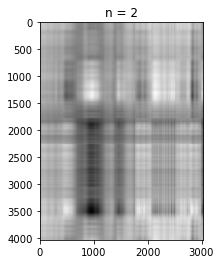

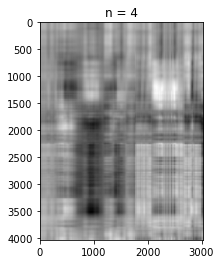

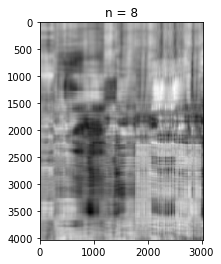

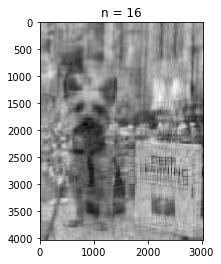

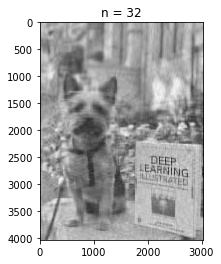

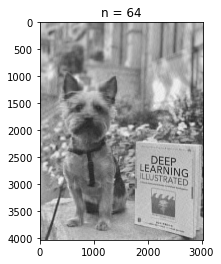

In [93]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [94]:
imgmat.shape

(4032, 3024)

In [95]:
full_representation = 4032*3024
full_representation

12192768

In [96]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [97]:
svd64_rep/full_representation

0.037042286050222556

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original! 

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.